In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve

In [ ]:
df = pd.read_csv('../data/kickstarter_final_data.csv', index_col=0, low_memory=False)

In [ ]:
cols_to_drop = [
    'name',
    'blurb',
    'category',
    'category_grouped',
    'country',
    'country_grouped',
    'currency',
    'currency_grouped',
    'deadline_weekday',
    'state_changed_at_weekday',
    'created_at_weekday',
    'launched_at_weekday'
]

existing = [c for c in cols_to_drop if c in df.columns]

df.drop(columns=existing, inplace=True)



In [ ]:
df.columns

Index(['goal', 'disable_communication', 'deadline', 'state_changed_at',
       'created_at', 'launched_at', 'staff_pick', 'backers_count',
       'static_usd_rate', 'usd_pledged', 'spotlight', 'name_len_clean',
       'blurb_len_clean', 'deadline_month', 'deadline_day', 'deadline_hr',
       'created_at_month', 'created_at_day', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days',
       'launch_to_state_change_days', 'SuccessfulBool', 'TOPCOUNTRY',
       'LaunchedTuesday', 'DeadlineWeekend', 'app', 'help', 'new', 'world',
       'canceled', 'country_grouped_CA', 'country_grouped_GB',
       'country_grouped_Other', 'country_grouped_US', 'currency_grouped_CAD',
       'currency_grouped_EUR', 'currency_grouped_GBP',
       'currency_grouped_Other', 'currency_grouped_USD',
       'deadline_weekday_Friday', 'deadline_weekday_Monday',
       'deadline_weekday_Saturday', 'deadline_week

In [ ]:
features_to_drop = ['usd_pledged', 'state_changed_at', 'staff_pick', 'backers_count', 'spotlight', 'launch_to_state_change_days', 'state_changed_at_weekday_Friday', 'state_changed_at_weekday_Monday', 'state_changed_at_weekday_Saturday', 'state_changed_at_weekday_Sunday', 'state_changed_at_weekday_Thursday', 'state_changed_at_weekday_Tuesday', 'state_changed_at_weekday_Wednesday']
print(df.columns.to_list())

def safe_drop_columns(df, features_to_drop):
    for column in features_to_drop:
        if column in df.columns.tolist():
            df.drop(column, axis=1, inplace=True)
safe_drop_columns(df, features_to_drop)

['goal', 'disable_communication', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate', 'usd_pledged', 'spotlight', 'name_len_clean', 'blurb_len_clean', 'deadline_month', 'deadline_day', 'deadline_hr', 'created_at_month', 'created_at_day', 'created_at_hr', 'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr', 'create_to_launch_days', 'launch_to_deadline_days', 'launch_to_state_change_days', 'SuccessfulBool', 'TOPCOUNTRY', 'LaunchedTuesday', 'DeadlineWeekend', 'app', 'help', 'new', 'world', 'canceled', 'country_grouped_CA', 'country_grouped_GB', 'country_grouped_Other', 'country_grouped_US', 'currency_grouped_CAD', 'currency_grouped_EUR', 'currency_grouped_GBP', 'currency_grouped_Other', 'currency_grouped_USD', 'deadline_weekday_Friday', 'deadline_weekday_Monday', 'deadline_weekday_Saturday', 'deadline_weekday_Sunday', 'deadline_weekday_Thursday', 'deadline_weekday_Tuesday', 'deadline_weekday_Wednesday', 'sta

# Baseline logistic regression model

Hold-out Test Set Evaluation
Accuracy: 0.7467894354252483

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83      2923
           1       0.60      0.39      0.47      1204

    accuracy                           0.75      4127
   macro avg       0.69      0.64      0.65      4127
weighted avg       0.73      0.75      0.73      4127


Confusion Matrix:
 [[2610  313]
 [ 732  472]]


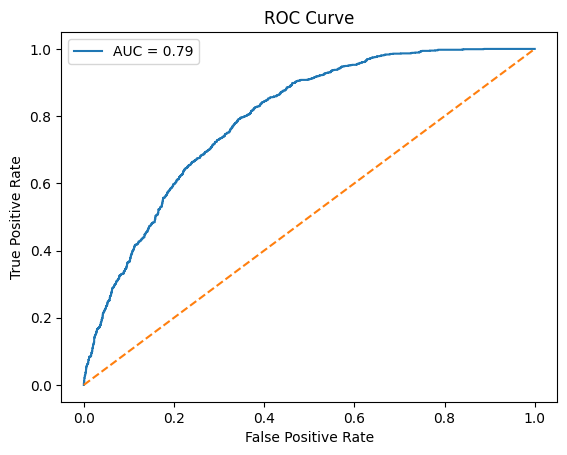


Cross-Validation Results (10-fold):
test_accuracy: 0.7137
test_precision: 0.5734
test_recall: 0.0746
test_f1: 0.1319
test_roc_auc: 0.6759

Cross-Validation Results (10-fold):
test_accuracy: 0.7137 ± 0.0040
test_precision: 0.5734 ± 0.0541
test_recall: 0.0746 ± 0.0090
test_f1: 0.1319 ± 0.0149
test_roc_auc: 0.6759 ± 0.0123


In [ ]:
X = df.drop(columns=['SuccessfulBool', 'deadline', 'created_at', 'launched_at'])
y = df['SuccessfulBool']

num_cols = ['goal', 'static_usd_rate', 'name_len_clean', 'blurb_len_clean',
            'deadline_month', 'deadline_day', 'deadline_hr',
            'created_at_month', 'created_at_day', 'created_at_hr',
            'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr',
            'create_to_launch_days', 'launch_to_deadline_days']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Hold-out Test Set Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(
    pipeline, X[num_cols], y, cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=False
)

print("\nCross-Validation Results (10-fold):")
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']:
    print(f"{metric}: {cv_results[metric].mean():.4f}")

print("\nCross-Validation Results (10-fold):")
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']:
    mean_score = cv_results[metric].mean()
    std_score = cv_results[metric].std()
    print(f"{metric}: {mean_score:.4f} ± {std_score:.4f}")


# GridSearchCV for AUC

Best ROC AUC Params: {'logreg__C': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}

Hold-out Test Set Evaluation (Based on AUC-Optimized Model):
Accuracy: 0.7463048219045312

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83      2923
           1       0.59      0.41      0.49      1204

    accuracy                           0.75      4127
   macro avg       0.69      0.65      0.66      4127
weighted avg       0.73      0.75      0.73      4127


Confusion Matrix:
 [[2584  339]
 [ 708  496]]


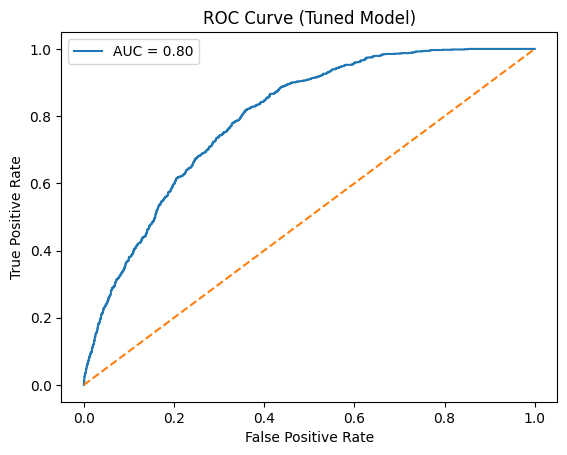


Cross-Validation Results with Tuned Model (10-fold):
test_accuracy: 0.7140 ± 0.0008
test_precision: 0.5631 ± 0.0119
test_recall: 0.0884 ± 0.0062
test_f1: 0.1527 ± 0.0089
test_roc_auc: 0.6800 ± 0.0096


In [ ]:
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

grid_auc = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')

grid_auc.fit(X_train, y_train)

best_pipeline = grid_auc.best_estimator_

y_pred = best_pipeline.predict(X_test)
y_proba = best_pipeline.predict_proba(X_test)[:, 1]

print("\nHold-out Test Set Evaluation (Based on AUC-Optimized Model):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Tuned Model)")
plt.legend()
plt.show()

cv_results = cross_validate(
    best_pipeline, X[num_cols], y, cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=False
)

print("\nCross-Validation Results with Tuned Model (10-fold):")
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']:
    mean_score = cv_results[metric].mean()
    std_score = cv_results[metric].std()
    print(f"{metric}: {mean_score:.4f} ± {std_score:.4f}")


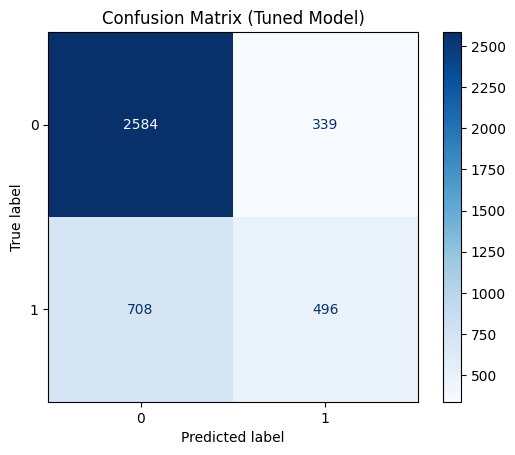

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_pipeline.named_steps['logreg'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Tuned Model)")
plt.show()


# GridSearchCV for ACC

Best ROC AUC Params: {'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}

Hold-out Test Set Evaluation (Based on AUC-Optimized Model):
Accuracy: 0.7448509813423795

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83      2923
           1       0.59      0.40      0.48      1204

    accuracy                           0.74      4127
   macro avg       0.69      0.64      0.65      4127
weighted avg       0.73      0.74      0.73      4127


Confusion Matrix:
 [[2595  328]
 [ 725  479]]


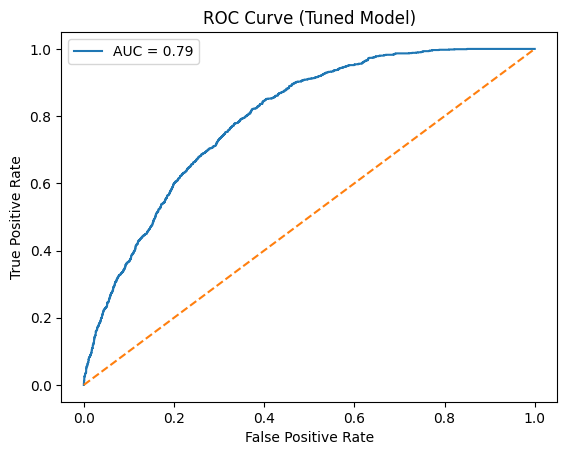


Cross-Validation Results with Tuned Model (10-fold):
test_accuracy: 0.7132 ± 0.0015
test_precision: 0.5649 ± 0.0221
test_recall: 0.0729 ± 0.0055
test_f1: 0.1291 ± 0.0088
test_roc_auc: 0.6753 ± 0.0097


In [ ]:
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

grid_acc = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_acc.fit(X_train, y_train)

print("Best ROC AUC Params:", grid_acc.best_params_)

best_pipeline = grid_a.bccest_estimator_

y_pred = best_pipeline.predict(X_test)
y_proba = best_pipeline.predict_proba(X_test)[:, 1]

print("\nHold-out Test Set Evaluation (Based on AUC-Optimized Model):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Tuned Model)")
plt.legend()
plt.show()

cv_results = cross_validate(
    best_pipeline, X[num_cols], y, cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=False
)

print("\nCross-Validation Results with Tuned Model (10-fold):")
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']:
    mean_score = cv_results[metric].mean()
    std_score = cv_results[metric].std()
    print(f"{metric}: {mean_score:.4f} ± {std_score:.4f}")


Comparing the models of GridSearchCV optimized for accuracy and ROC, the both model trade-offs are minimal with similar accuracy. Optimizing for ROC-AUC slightly improved recall. Logistic regression may be too simple to capture complex patterns in this dataset.

# Attempting SMOTE

Hold-out Test Set Evaluation
Accuracy: 0.5972861642839835

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.57      0.67      2923
           1       0.39      0.67      0.49      1204

    accuracy                           0.60      4127
   macro avg       0.60      0.62      0.58      4127
weighted avg       0.69      0.60      0.62      4127


Confusion Matrix:
 [[1657 1266]
 [ 396  808]]


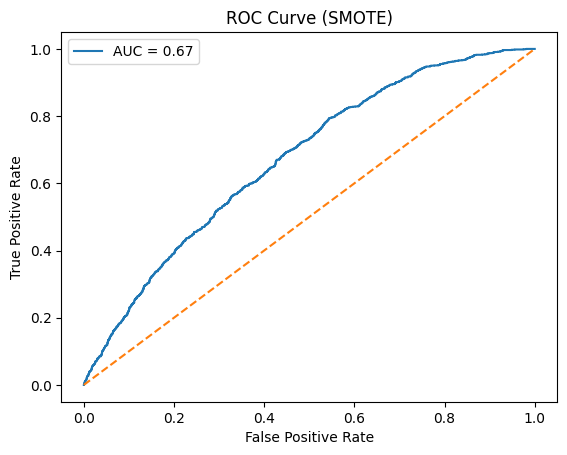


Cross-Validation Results (10-fold with SMOTE):
test_accuracy: 0.6060
test_precision: 0.3963
test_recall: 0.6695
test_f1: 0.4977
test_roc_auc: 0.6755


In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['SuccessfulBool', 'deadline', 'created_at', 'launched_at'])
y = df['SuccessfulBool']

num_cols = ['goal', 'static_usd_rate', 'name_len_clean', 'blurb_len_clean',
            'deadline_month', 'deadline_day', 'deadline_hr',
            'created_at_month', 'created_at_day', 'created_at_hr',
            'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr',
            'create_to_launch_days', 'launch_to_deadline_days']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train[num_cols], y_train)

y_pred = pipeline.predict(X_test[num_cols])
y_proba = pipeline.predict_proba(X_test[num_cols])[:, 1]

print("Hold-out Test Set Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SMOTE)")
plt.legend()
plt.show()

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(
    pipeline, X[num_cols], y, cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=False
)

print("\nCross-Validation Results (10-fold with SMOTE):")
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']:
    print(f"{metric}: {cv_results[metric].mean():.4f}")


# Expanding Grid of Hyperparameters focusing on optimizing for ROC

In [ ]:
X = df.drop(columns=['SuccessfulBool', 'deadline', 'created_at', 'launched_at'])
y = df['SuccessfulBool']

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.1, random_state=42, stratify=y_trainval
)

num_cols = [
    'goal', 'static_usd_rate', 'name_len_clean', 'blurb_len_clean',
    'deadline_month', 'deadline_day', 'deadline_hr',
    'created_at_month', 'created_at_day', 'created_at_hr',
    'launched_at_month', 'launched_at_day', 'launched_at_yr', 'launched_at_hr',
    'create_to_launch_days', 'launch_to_deadline_days'
]

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, random_state=42))
])

param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__solver': ['liblinear', 'saga'],          # liblinear supports l1/l2, saga supports elasticnet
    'clf__class_weight': [None, 'balanced'],
    'clf__l1_ratio': [0.0, 0.5, 1.0],               # only used when penalty='elasticnet'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    pipe, param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV AUC:", grid.best_score_)

best_model = grid.best_estimator_
probs_val = best_model.predict_proba(X_val)[:,1]

prec, rec, thresh = precision_recall_curve(y_val, probs_val)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx   = np.nanargmax(f1_scores)
best_thresh = thresh[best_idx]
print(f"Best threshold for F1 on val: {best_thresh:.3f}, F1 = {f1_scores[best_idx]:.3f}")

probs_test = best_model.predict_proba(X_test)[:,1]
y_pred_test = (probs_test >= best_thresh).astype(int)

print("\n--- Test set performance ---")
print("ROC AUC:", roc_auc_score(y_test, probs_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\harini\cmpe188\kickstarter-project-success-predictions\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\harini\cmpe188\kickstarter-project-success-predictions\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\harini\cmpe188\kickstarter-project-success-predictions\venv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\harini\cmpe188\kickstarter-project-succes

Best params: {'clf__C': 10, 'clf__class_weight': None, 'clf__l1_ratio': 0.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best CV AUC: 0.797182163418752
Best threshold for F1 on val: 0.231, F1 = 0.585

--- Test set performance ---
ROC AUC: 0.796774180715894
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.56      0.70      2923
           1       0.45      0.89      0.60      1204

    accuracy                           0.65      4127
   macro avg       0.69      0.72      0.65      4127
weighted avg       0.79      0.65      0.67      4127

Confusion Matrix:
 [[1632 1291]
 [ 135 1069]]


A more comprehensive grid search on logistic regression using a wider range of hyperparameters: solver types, regularization penalties, and class weighting. The model was trained using ROC-AUC as the evaluation metric and evaluated using F1-threshold tuning on a validation set.The threshold tuning significantly improved recall for the positive class (0.89), which is useful in applications where missing successful projects is costly.

# Run using GPU

In [ ]:
import torch
print(torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("Current device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "n/a")


2.7.0+cu118
CUDA available: True
CUDA device count: 1
Current device name: NVIDIA GeForce RTX 4070 Laptop GPU


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from skorch.classifier import NeuralNetBinaryClassifier

X = df.drop(columns=['SuccessfulBool','deadline','created_at','launched_at']).values.astype(np.float32)
y = df['SuccessfulBool'].values.astype(np.float32)

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.1, random_state=42, stratify=y_trainval
)

class LogisticModule(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)
    def forward(self, X):
        return self.linear(X).squeeze(-1)

# Wrap in NeuralNetBinaryClassifier (runs on GPU)
net = NeuralNetBinaryClassifier(
    module=LogisticModule,
    module__input_dim=X_train.shape[1],
    optimizer=optim.Adam,
    max_epochs=30,
    lr=0.01,
    device='cuda',
    iterator_train__batch_size=256,
)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('net',    net),
])

param_grid = {
    'net__lr': [1e-4, 3e-3, 1e-2, 3e-2],
    'net__max_epochs': [50, 100],
    'net__optimizer__weight_decay': [0.0, 1e-2],
}


# GridSearchCV on ROC-AUC
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(pipe, param_grid,
                  cv=cv, scoring='roc_auc',
                  n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Best CV AUC:", gs.best_score_)

probs_val = gs.predict_proba(X_val)[:,1]
prec, rec, thresh = precision_recall_curve(y_val, probs_val)
f1s = 2 * prec * rec / (prec + rec + 1e-12)
best_thr = thresh[np.nanargmax(f1s)]
print(f"Val best threshold: {best_thr:.3f}")

probs_test = gs.predict_proba(X_test)[:,1]
y_pred_test = (probs_test >= best_thr).astype(int)

print("Test ROC AUC:", roc_auc_score(y_test, probs_test))
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))


Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\harini\cmpe188\kickstarter-project-success-predictions\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\harini\cmpe188\kickstarter-project-success-predictions\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\harini\cmpe188\kickstarter-project-success-predictions\venv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\harini\cmpe188\kickstarter-project-success-pre

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.5882       0.7078        0.5447  0.1545
      2        0.5221       0.7297        0.5162  0.2333
      3        0.5040       0.7405        0.5065  0.1416
      4        0.4972       0.7402        0.5026  0.2463
      5        0.4940       0.7412        0.5005  0.2598
      6        0.4921       0.7428        0.4991  0.2621
      7        0.4908       0.7428        0.4981  0.2375
      8        0.4899       0.7425        0.4972  0.1719
      9        0.4891       0.7425        0.4965  0.1461
     10        0.4885       0.7425        0.4959  0.1225
     11        0.4879       0.7428        0.4953  0.1297
     12        0.4874       0.7442        0.4948  0.1442
     13        0.4869       0.7435        0.4943  0.2289
     14        0.4865       0.7432        0.4938  0.2029
     15        0.4861       0.7425        0.4934  0.1777
     16        0.4857       0.7

Simple Logistic Regression (No Hidden Layer)
Architecture: Single linear layer (nn.Linear)

Best Parameters:

lr = 0.01

max_epochs = 100

weight_decay = 0.0

Validation Threshold (best F1): 0.250

Test ROC AUC: 0.7928

Test Accuracy: 66%

Test F1-Score (Class 1): 0.59

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from skorch.classifier import NeuralNetBinaryClassifier
from skorch.callbacks import EarlyStopping, LRScheduler

X = df.drop(columns=['SuccessfulBool','deadline','created_at','launched_at']) \
      .values.astype(np.float32)
y = df['SuccessfulBool'].values.astype(np.float32)

X_trval, X_test, y_trval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trval, y_trval, test_size=0.1, random_state=42, stratify=y_trval
)

# one hidden layer + dropout
class LogisticModule(nn.Module):
    def __init__(self, input_dim, hidden_dim=50, dropout=0.0):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )
    def forward(self, X):
        return self.net(X).squeeze(-1)


net = NeuralNetBinaryClassifier(
    module=LogisticModule,
    module__input_dim=X_train.shape[1],
    # these two will get tuned by GridSearch
    module__hidden_dim=50,
    module__dropout=0.0,

    criterion=nn.BCEWithLogitsLoss,
    optimizer=optim.Adam,


    max_epochs=30,
    lr=1e-2,
    batch_size=256,
    device='cuda',


    callbacks=[
        EarlyStopping(patience=5, threshold=1e-3),
        ('lr_sched', LRScheduler(
            policy='ReduceLROnPlateau',
            patience=2,
            factor=0.5,
            monitor='valid_loss',
        )),
    ],
)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('net', net),
])

param_grid = {
    'net__lr':                [1e-3, 1e-2, 1e-1],
    'net__optimizer__weight_decay': [0.0, 1e-4, 1e-3],
    'net__module__dropout':   [0.0, 0.2, 0.5],
    'net__module__hidden_dim':[20, 50, 100],
    'net__max_epochs':        [20, 50],
    'net__batch_size':        [128, 256, 512],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(
    pipe,
    param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=1,
    verbose=2,
    error_score='raise'
)
gs.fit(X_train, y_train)

print("→ Best params:", gs.best_params_)
print("→ Best CV AUC:", gs.best_score_)

probs_val = gs.predict_proba(X_val)[:,1]
prec, rec, thresh = precision_recall_curve(y_val, probs_val)
f1s = 2 * prec * rec / (prec + rec + 1e-12)
best_thr = thresh[np.nanargmax(f1s)]
print(f"Best threshold (val) = {best_thr:.3f}")

probs_test = gs.predict_proba(X_test)[:,1]
y_pred = (probs_test >= best_thr).astype(int)

print("Test ROC AUC:", roc_auc_score(y_test, probs_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
  epoch    train_loss    valid_acc    valid_loss      lr     dur
-------  ------------  -----------  ------------  ------  ------
      1        0.6108       0.7106        0.5756  0.0010  0.4830
      2        0.5394       0.7215        0.5335  0.0010  0.3092
      3        0.5058       0.7308        0.5163  0.0010  0.2350
      4        0.4908       0.7278        0.5105  0.0010  0.2596
      5        0.4831       0.7295        0.5080  0.0010  0.2426
      6        0.4781       0.7308        0.5064  0.0010  0.2341
      7        0.4740       0.7295        0.5053  0.0010  0.2609
      8        0.4704       0.7265        0.5043  0.0010  0.2353
      9        0.4672       0.7261        0.5036  0.0010  0.2195
     10        0.4643       0.7257        0.5029  0.0010  0.2200
     11        0.4615       0.7270        0.5024  0.0010  0.2347
     12        0.4590       0.7270        0.5021  0.0010  0.2556
     13        0.4565     

One Hidden Layer + Dropout
Architecture:

Linear → ReLU → Dropout → Linear

Best Parameters:

lr = 0.001

max_epochs = 20

hidden_dim = 100

dropout = 0.5

batch_size = 128

weight_decay = 0.0

Validation Threshold (best F1): 0.279

Test ROC AUC: 0.7977

Test Accuracy: 68%

Test F1-Score (Class 1): 0.60

The second model, with hidden layer and dropout regularization, outperformed the first logistic model in ROC AUC, accuracy, and F1-score. Regularization helped capture more complex patterns in the Kickstarter dataset.